In [1]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)


Mounted at /content/gdrive/


In [2]:
!unzip /content/gdrive/MyDrive/Dataset/IMGA_DATABASE1.zip

Streaming output truncated to the last 5000 lines.
  inflating: IMGA_DATABASE_2/IMG_DATABASE/train/USA/fig_02_re_19centerCenter_1.png  
  inflating: IMGA_DATABASE_2/IMG_DATABASE/train/USA/fig_02_re_19centerCenter_2.png  
  inflating: IMGA_DATABASE_2/IMG_DATABASE/train/USA/fig_02_re_19centerCenter_3.png  
  inflating: IMGA_DATABASE_2/IMG_DATABASE/train/USA/fig_02_re_19centerCenter_4.png  
  inflating: IMGA_DATABASE_2/IMG_DATABASE/train/USA/fig_02_re_19centerCenter_5.png  
  inflating: IMGA_DATABASE_2/IMG_DATABASE/train/USA/fig_02_re_19sheared0.png  
  inflating: IMGA_DATABASE_2/IMG_DATABASE/train/USA/fig_02_re_19sheared1.png  
  inflating: IMGA_DATABASE_2/IMG_DATABASE/train/USA/fig_02_re_19sheared2.png  
  inflating: IMGA_DATABASE_2/IMG_DATABASE/train/USA/fig_02_re_19sheared3.png  
  inflating: IMGA_DATABASE_2/IMG_DATABASE/train/USA/fig_02_re_19sheared4.png  
  inflating: IMGA_DATABASE_2/IMG_DATABASE/train/USA/fig_02_re_19sheared5.png  
  inflating: IMGA_DATABASE_2/IMG_DATABASE/train/US

In [3]:
import sys
import os
import glob
import numpy as np
from tqdm import tqdm
import cv2
import matplotlib.pyplot as plt

In [4]:
train_path = "IMGA_DATABASE_2/IMG_DATABASE/train"
valid_path = "IMGA_DATABASE_2/IMG_DATABASE/valid"
test_path = "IMGA_DATABASE_2/IMG_DATABASE/test"

In [5]:
# divide data images into train, test subdirectory
import glob
import random
import shutil

image_dirs = ['ABER', 'AF', 'APB', 'VEB', 'FVN', 'LBBB', 'UCB', 'RBBB', 'S', 'PVC', 'NB', 'PB', 'VF', 'AFIB', 'VB', 'VAL', 'HF', 'HC', 'PAL', 'CMO', 'STA', 'MH', 'BBB', 'DYS', 'MI', 'MYOC', 'USA']

if os.path.isdir('IMGA_DATABASE_2/IMG_DATABASE/valid/ABER') is False:
    for i in image_dirs:
        current_path = 'IMGA_DATABASE_2/IMG_DATABASE/train/'+i
        path_valid = 'IMGA_DATABASE_2/IMG_DATABASE/valid/'+i
        os.makedirs(path_valid)
        path, dirs, files = next(os.walk(current_path))
        no_of_files = len(files)
        no_of_valid_dir_files = round(no_of_files*0.2)
        print(no_of_files)
        for j in random.sample(glob.glob(current_path+'/fig*'),no_of_valid_dir_files):
            shutil.move(j,path_valid)
        
        
# moving 20% data from MIT-BIH_DATABASE/train/ directory to MIT-BIH_DATABASE/valid subdirectory 

# no need to run this block anymore after validation data folder (valid) creation

1050
1027
1044
1092
1058
990
1035
1060
1002
1092
1066
1092
1056
1053
1054
1008
1050
1089
1050
1086
1062
1042
1017
1076
1043
1080
1020


In [6]:
# count the length of different directory inside dataset and plot pie chart function

def plot_pie_chart_of_data(data, labels, colors, figName_with_ext, figureSize=(10,10), center_white_circle_radius=0.7):
    plt.figure(figsize=figureSize)
    my_circle=plt.Circle((0,0), center_white_circle_radius, color='white')
    plt.pie(data, labels= labels, colors= colors, autopct='%1.1f%%')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.show()
    p.savefig(figName_with_ext, dpi=400, bbox_inches='tight')

Number of images in each directory=[210, 205, 209, 218, 212, 198, 207, 212, 200, 218, 213, 218, 211, 211, 211, 202, 210, 218, 210, 217, 212, 208, 203, 215, 209, 216, 204] and total number of images=5677


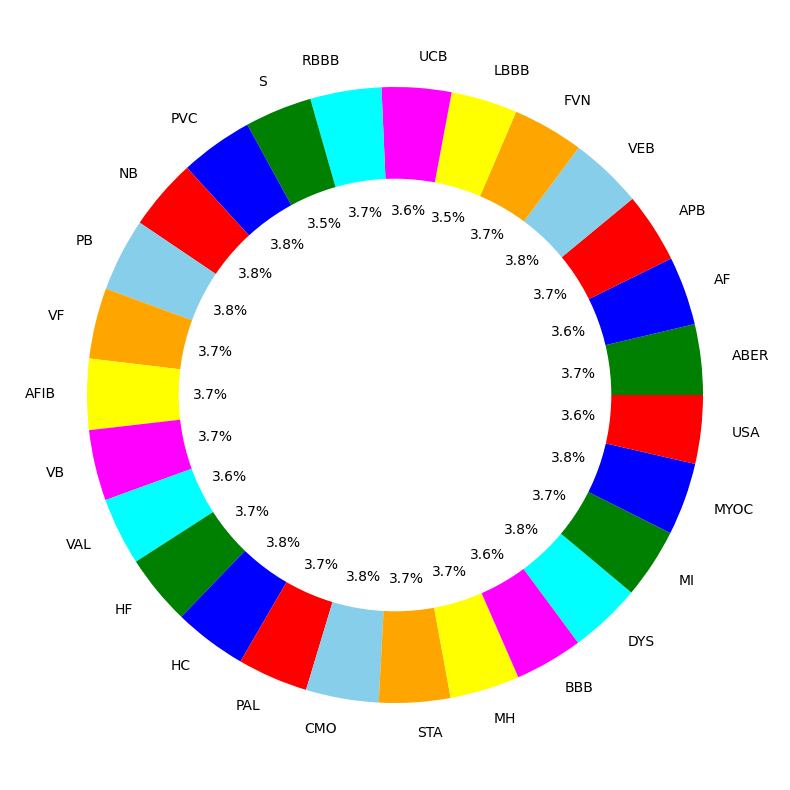

In [7]:
# count the length of datas in valid directory inside dataset
Database_DIR = 'IMGA_DATABASE_2/IMG_DATABASE/valid/'
image_dirs = ['ABER/', 'AF/', 'APB/', 'VEB/', 'FVN/', 'LBBB/', 'UCB/', 'RBBB/', 'S/', 'PVC/', 'NB/', 'PB/', 'VF/', 'AFIB/', 'VB/', 'VAL/', 'HF/', 'HC/', 'PAL/', 'CMO/', 'STA/', 'MH/', 'BBB/', 'DYS/', 'MI/', 'MYOC/', 'USA/']
no_of_files_in_dir=[]
for image_dir in image_dirs:
    path, dirs, files = next(os.walk(os.path.join(Database_DIR,image_dir)))
    no_of_files_in_dir.append(len(files)) 

print('Number of images in each directory={} and total number of images={}'.format(no_of_files_in_dir, sum(no_of_files_in_dir)))

labels = ['ABER', 'AF', 'APB', 'VEB', 'FVN', 'LBBB', 'UCB', 'RBBB', 'S', 'PVC', 'NB', 'PB', 'VF', 'AFIB', 'VB', 'VAL', 'HF', 'HC', 'PAL', 'CMO', 'STA', 'MH', 'BBB', 'DYS', 'MI', 'MYOC', 'USA']
colors = ['green','blue','red','skyblue','orange', 'yellow','magenta', 'cyan', 'green','blue','red','skyblue','orange', 'yellow','magenta', 'cyan', 'green','blue','red','skyblue','orange', 'yellow','magenta', 'cyan', 'green','blue','red']

plot_pie_chart_of_data(no_of_files_in_dir, labels, colors, 'data_distribution_valid_dir.png')

# no need to run this block anymore after validation data folder (valid) creation

In [8]:
# Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Activation, Conv2D, Dense, Dropout, Flatten, MaxPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.metrics import categorical_crossentropy

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
# dataset_size*epoch = number_of_iteration*batch_size

batchSize = 30

train_gen = ImageDataGenerator(rescale=1./255)
valid_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)

In [10]:
train_batches = train_gen.flow_from_directory(directory=train_path, target_size=(150,150), classes=['ABER', 'AF', 'APB', 'VEB', 'FVN', 'LBBB', 'UCB', 'RBBB', 'S', 'PVC', 'NB', 'PB', 'VF', 'AFIB', 'VB', 'VAL', 'HF', 'HC', 'PAL', 'CMO', 'STA', 'MH', 'BBB', 'DYS', 'MI', 'MYOC', 'USA'], seed=26)
valid_batches = train_gen.flow_from_directory(directory=valid_path, target_size=(150,150), classes=['ABER', 'AF', 'APB', 'VEB', 'FVN', 'LBBB', 'UCB', 'RBBB', 'S', 'PVC', 'NB', 'PB', 'VF', 'AFIB', 'VB', 'VAL', 'HF', 'HC', 'PAL', 'CMO', 'STA', 'MH', 'BBB', 'DYS', 'MI', 'MYOC', 'USA'], seed=26)
test_batches = test_gen.flow_from_directory(directory=test_path, target_size=(150,150), classes=['ABER', 'AF', 'APB', 'VEB', 'FVN', 'LBBB', 'UCB', 'RBBB', 'S', 'PVC', 'NB', 'PB', 'VF', 'AFIB', 'VB', 'VAL', 'HF', 'HC', 'PAL', 'CMO', 'STA', 'MH', 'BBB', 'DYS', 'MI', 'MYOC', 'USA'], seed=26, shuffle=False)

Found 22717 images belonging to 27 classes.
Found 5677 images belonging to 27 classes.
Found 1250 images belonging to 27 classes.


In [12]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import MaxPooling2D

def modified_densenet(input_h, input_w, nb_classes):
    input_shape = (input_h, input_w, 3)
    
    # Define the input tensor
    input_tensor = Input(shape=input_shape)
    
    # Load pre-trained DenseNet121 model trained on ImageNet
    base_model = DenseNet121(include_top=False, weights='imagenet', input_shape=input_shape)
    x = base_model(input_tensor)
    
    # Add custom head layers
    x = Conv2D(filters=64, kernel_size=3, activation='relu', strides=1, padding='same')(x) # added CNN layer
    x = MaxPooling2D()(x)
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(nb_classes, activation='softmax')(x)

    # Create and compile the model
    optimizer = SGD(lr=0.01, momentum=0.92)
    model = Model(inputs=input_tensor, outputs=x)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model


In [13]:
model = modified_densenet(150, 150, 27)
print(model.summary())

29084464/29084464 [==============================] - 1s 0us/step


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 densenet121 (Functional)    (None, 4, 4, 1024)        7037504   
                                                                 
 conv2d (Conv2D)             (None, 4, 4, 64)          589888    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 2, 2, 64)         0         
 )                                                               
                                                                 
 global_average_pooling2d (G  (None, 64)               0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 256)               16640 

In [14]:
# train model
Epoch = 15
Verbose = 1

model.fit(x=train_batches, validation_data=valid_batches, epochs=Epoch, verbose=Verbose, shuffle=True)

# save model (architecture, optimizer, weights, ...all)
if os.path.isdir('modelss') is False:
    os.makedirs('modelss')
if os.path.isfile('modelss/ecg_arrhythmia_detection_model.h5') is False:
    model.save('modelss/ecg_arrhythmia_detection_model.h5')
    print('model saved successfully.')

Epoch 1/15
710/710 [==============================] - 198s 209ms/step - loss: 1.0762 - accuracy: 0.6778 - val_loss: 1.6983 - val_accuracy: 0.6218
Epoch 2/15
710/710 [==============================] - 140s 197ms/step - loss: 0.3178 - accuracy: 0.9100 - val_loss: 0.4957 - val_accuracy: 0.8869
Epoch 3/15
710/710 [==============================] - 142s 200ms/step - loss: 0.1589 - accuracy: 0.9561 - val_loss: 0.2138 - val_accuracy: 0.9336
Epoch 4/15
710/710 [==============================] - 141s 198ms/step - loss: 0.1083 - accuracy: 0.9696 - val_loss: 0.1213 - val_accuracy: 0.9660
Epoch 5/15
710/710 [==============================] - 141s 198ms/step - loss: 0.0736 - accuracy: 0.9802 - val_loss: 0.0959 - val_accuracy: 0.9760
Epoch 6/15
710/710 [==============================] - 140s 198ms/step - loss: 0.0718 - accuracy: 0.9827 - val_loss: 0.1220 - val_accuracy: 0.9623
Epoch 7/15
710/710 [==============================] - 139s 195ms/step - loss: 0.0486 - accuracy: 0.9877 - val_loss: 0.8897 -

In [15]:
# load model
from tensorflow.keras.models import load_model

model = load_model('modelss/ecg_arrhythmia_detection_model.h5')
#prev_saved_model = load_model('models/cnn.h5')

print(model.summary())
# print(prev_saved_model.get_weights())
# print(prev_saved_model.optimizer)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 densenet121 (Functional)    (None, 4, 4, 1024)        7037504   
                                                                 
 conv2d (Conv2D)             (None, 4, 4, 64)          589888    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 2, 2, 64)         0         
 )                                                               
                                                                 
 global_average_pooling2d (G  (None, 64)               0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 256)               16640 

In [16]:
# train model
Epoch = 2
Verbose = 1

model.fit(x=train_batches, validation_data=valid_batches, epochs=Epoch, verbose=Verbose, shuffle=True)
model.save('models/ecg_arrgythmia_detection_model.h5')
print('model saved successfully.')

Epoch 1/2
710/710 [==============================] - 165s 197ms/step - loss: 0.0090 - accuracy: 0.9979 - val_loss: 0.0291 - val_accuracy: 0.9930
Epoch 2/2
710/710 [==============================] - 139s 196ms/step - loss: 0.0088 - accuracy: 0.9978 - val_loss: 0.0126 - val_accuracy: 0.9968
model saved successfully.


In [17]:
# test model
#epoch = 2
predictions = model.predict(x = test_batches, verbose=1)

40/40 [==============================] - 5s 72ms/step


In [18]:
# evaluate test results
results = model.evaluate(x = test_batches, verbose=1)

40/40 [==============================] - 3s 62ms/step - loss: 0.0981 - accuracy: 0.9840


In [19]:
results

[0.09814120084047318, 0.984000027179718]

In [20]:
test_labels = test_batches.classes
print(test_labels)

[ 0  0  0 ... 26 26 26]


In [21]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [22]:
# confusion matrix plot function
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix_custom(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """ prints and plots confusion matrix. 
        normalization can be applied by setting `normalize=True` """

    plt.figure(figsize=(29, 29))
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('int') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix, without normalization ')
    
    print(cm)
    
    thresh = cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "{:0.2f}".format(cm[i, j]), horizontalalignment="center", color="white" if cm[i,j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('confusion.jpg', dpi=400, pad_inches=0.1)

Confusion matrix, without normalization 
[[  8   0   1   0   1   1   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  1  18   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    1   0   0   0   0   0   0   0]
 [  0   0  44   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0  21   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0  12   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  59   0   0   1   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  1   2   0   0   0   0   3   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  53   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  45   0   0   0   0   0   0   0   0   0
    0   0   0

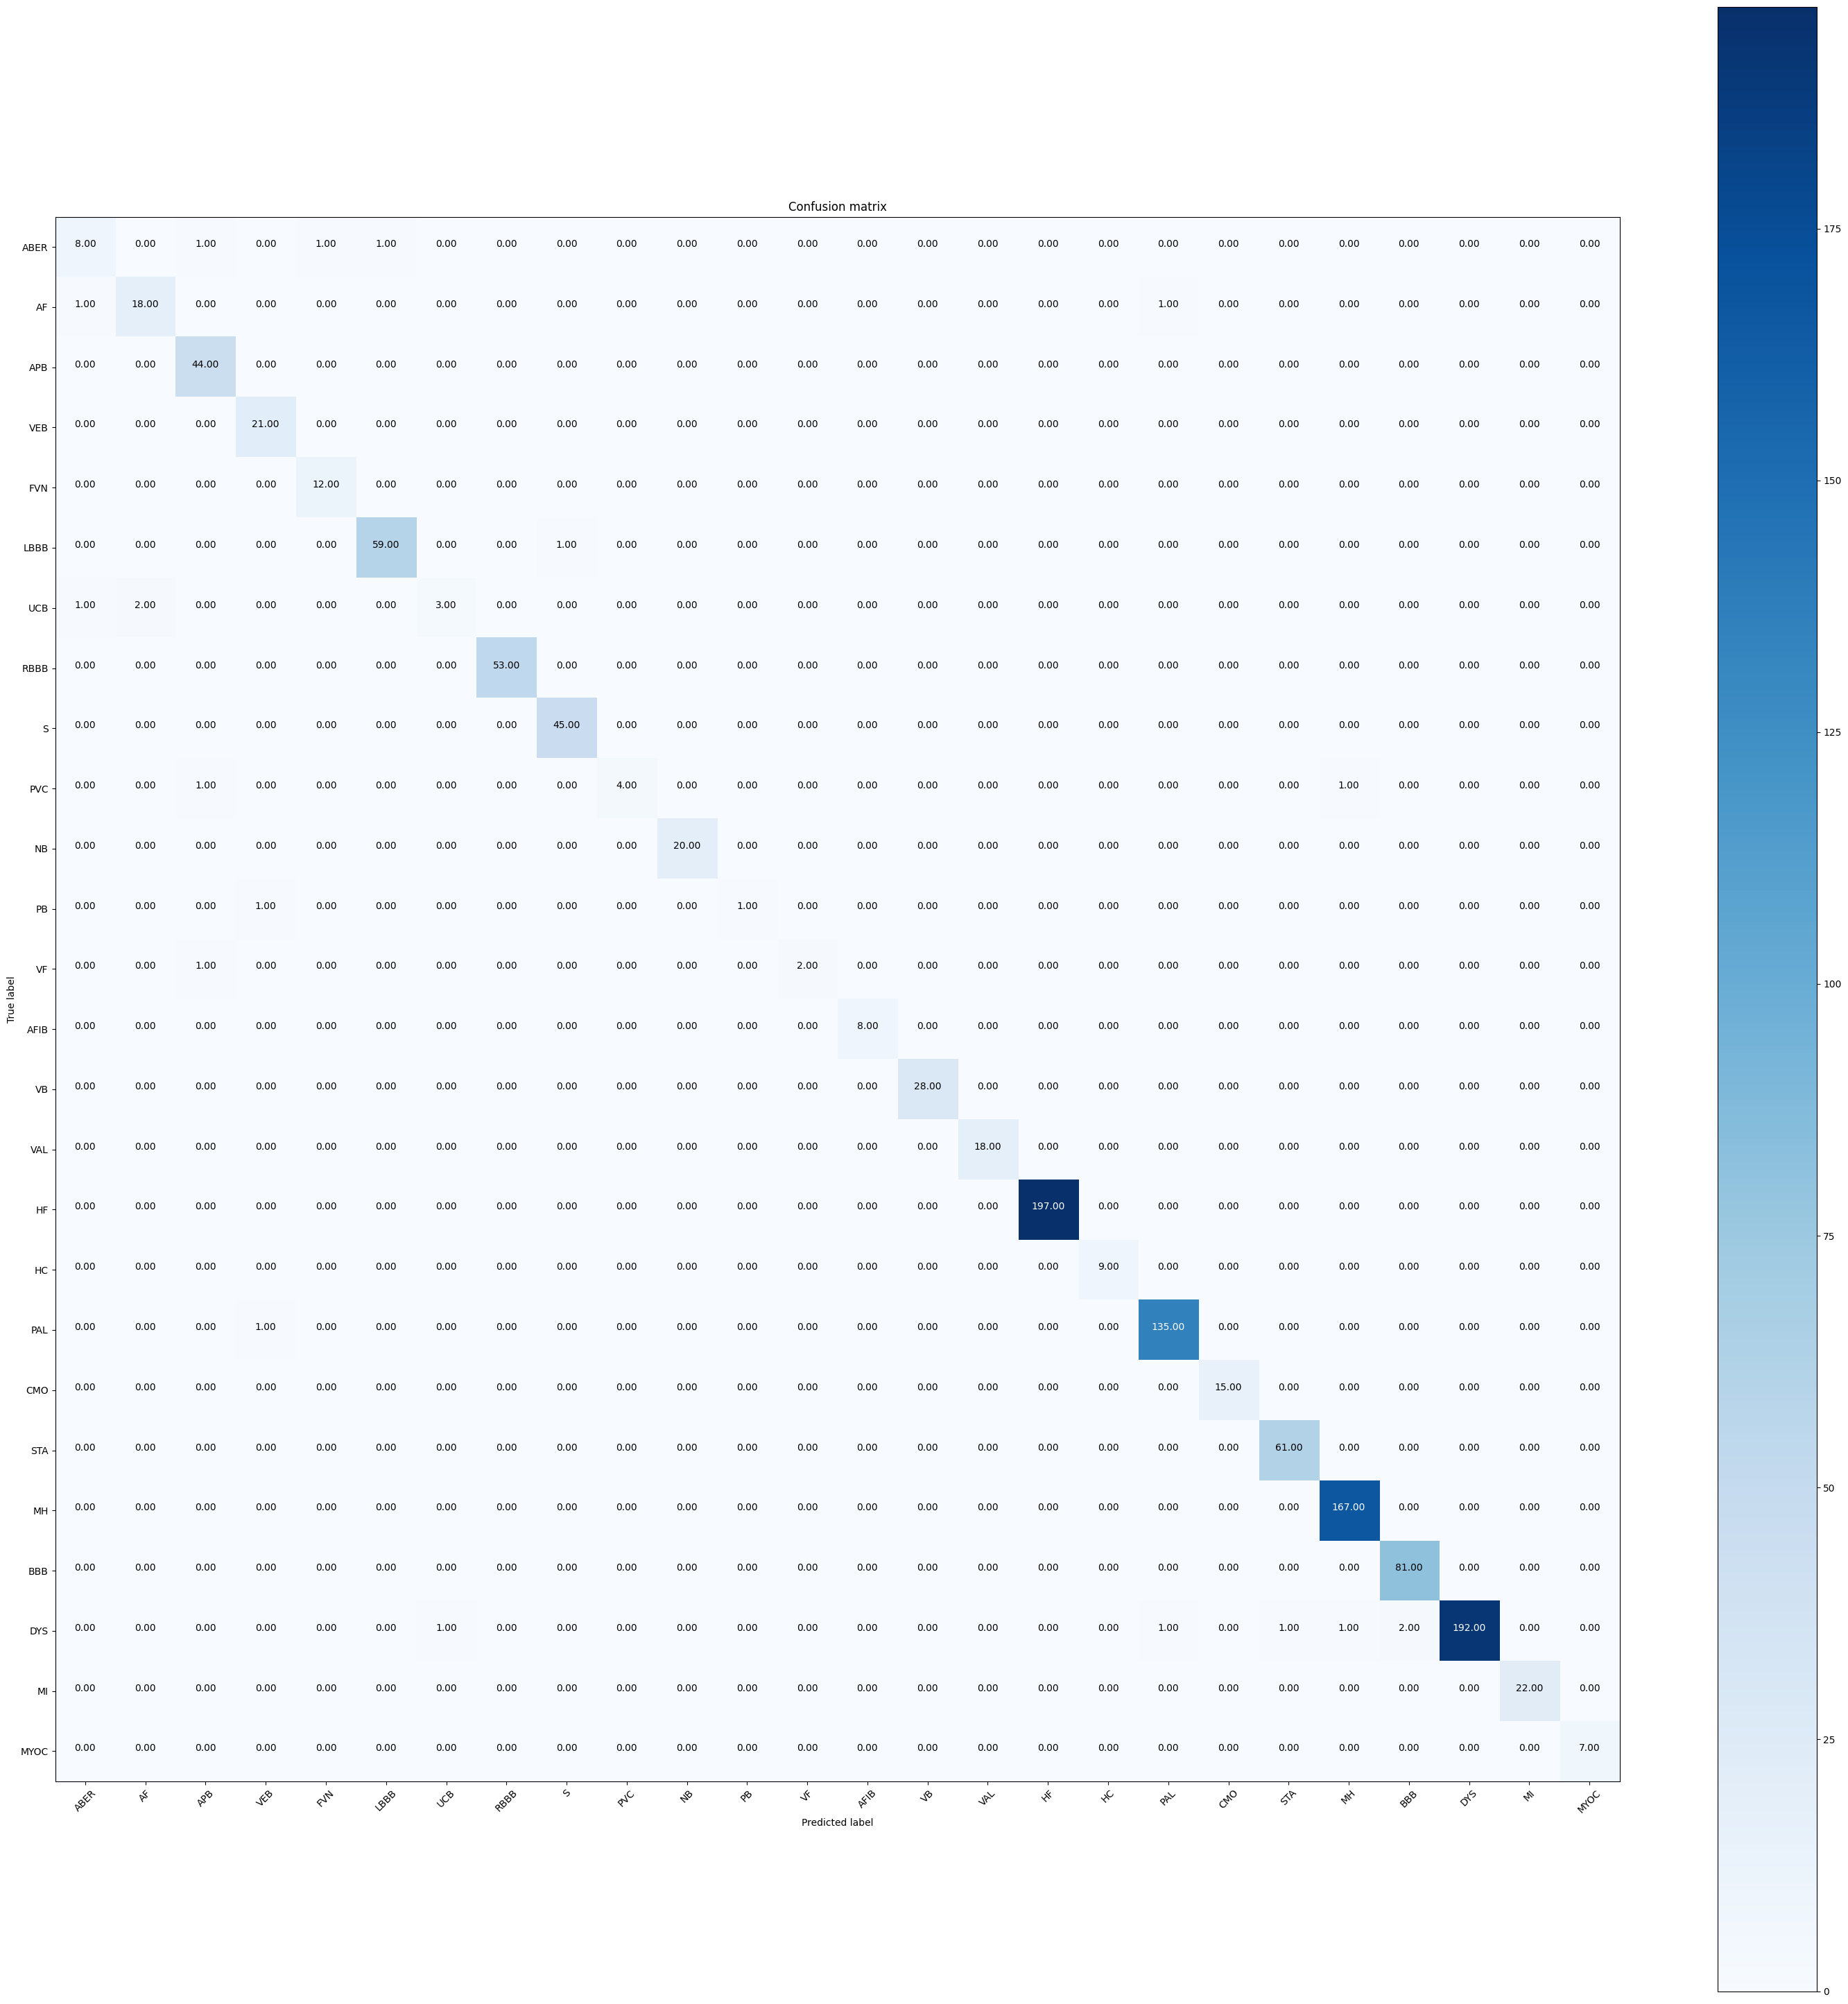

In [23]:
# confusion matrix output
cm = confusion_matrix(y_true = test_labels, y_pred = rounded_predictions)
cm_plot_lables = ['ABER', 'AF', 'APB', 'VEB', 'FVN', 'LBBB', 'UCB', 'RBBB', 'S', 'PVC', 'NB', 'PB', 'VF', 'AFIB', 'VB', 'VAL', 'HF', 'HC', 'PAL', 'CMO', 'STA', 'MH', 'BBB', 'DYS', 'MI', 'MYOC' ]
# non normalized confusion matrix
#plot_confusion_matrix_custom(cm = cm, classes = cm_plot_lables)

# normalized confusion matrix
plot_confusion_matrix_custom(cm = cm, classes = cm_plot_lables, normalize = False)

In [24]:
# classification report
from sklearn.metrics import classification_report

classification_report_result = classification_report(test_labels, rounded_predictions, target_names=cm_plot_lables)
print(classification_report_result)

              precision    recall  f1-score   support

        ABER       0.80      0.73      0.76        11
          AF       0.90      0.90      0.90        20
         APB       0.94      1.00      0.97        44
         VEB       0.91      1.00      0.95        21
         FVN       0.92      1.00      0.96        12
        LBBB       0.98      0.98      0.98        60
         UCB       0.75      0.50      0.60         6
        RBBB       1.00      1.00      1.00        53
           S       0.98      1.00      0.99        45
         PVC       1.00      0.67      0.80         6
          NB       1.00      1.00      1.00        20
          PB       1.00      0.50      0.67         2
          VF       1.00      0.67      0.80         3
        AFIB       1.00      1.00      1.00         8
          VB       1.00      1.00      1.00        28
         VAL       1.00      1.00      1.00        18
          HF       1.00      1.00      1.00       197
          HC       1.00    